In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns
%matplotlib inline

In [31]:
df = pd.read_csv('data/serviciosbomberoshmo_ready.csv', encoding='latin1')

[Text(0, 0.5, 'TOTAL'), Text(0.5, 0, 'TOP COLONIAS INCENDIOS')]

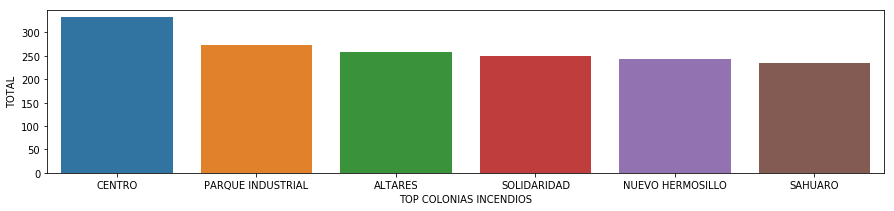

In [32]:
no_existe = -1
top_six = df[(df['COLONIA']!='SIN COLONIA') & (df['TIPO'].str.find('INCENDIO')!=no_existe)]['COLONIA'].value_counts()[:6]

x = top_six.index
y = top_six.values

plt.figure(figsize=(15,3))
ax= sns.barplot(x,y)

ax.set(xlabel='TOP COLONIAS INCENDIOS', ylabel='TOTAL')

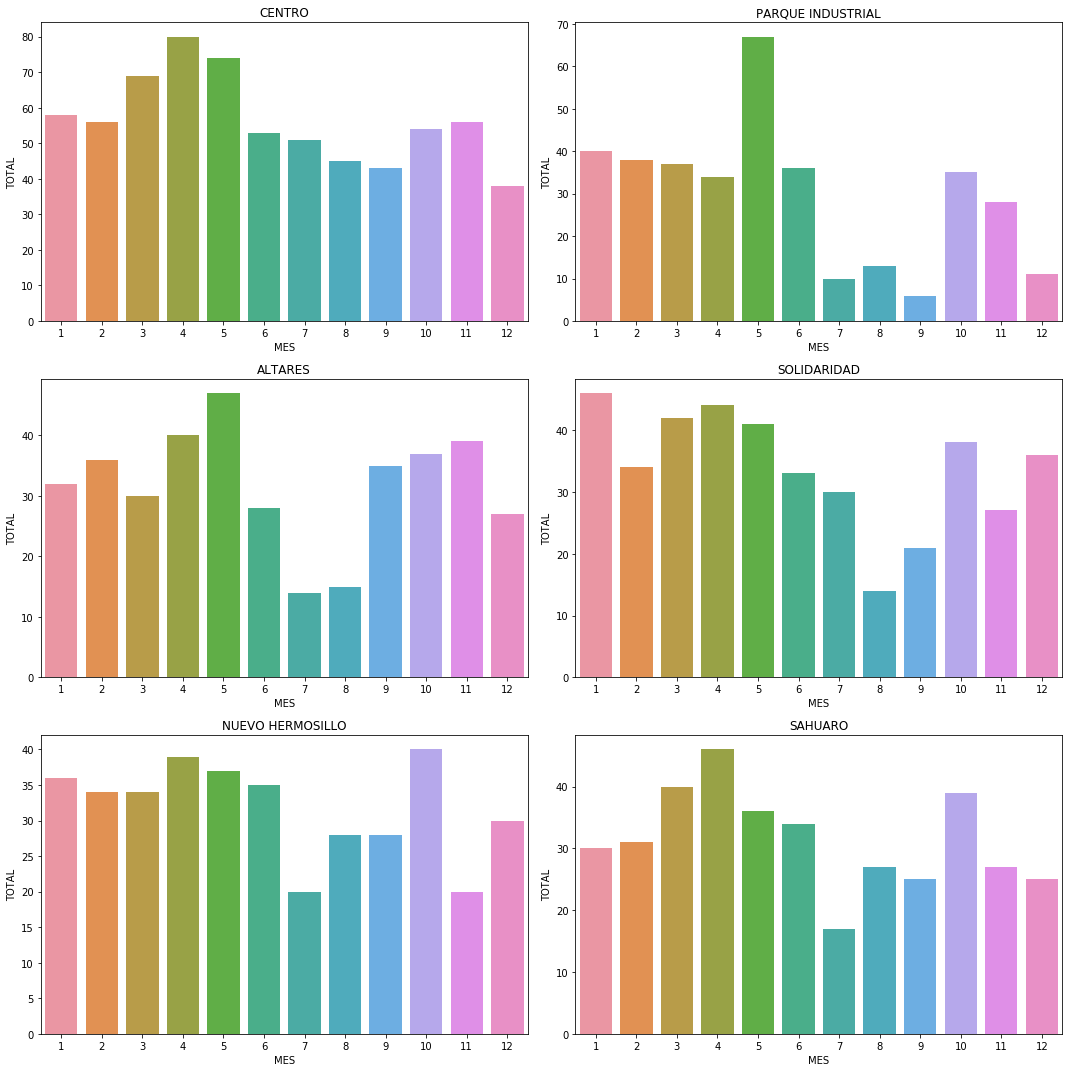

In [33]:
def get_position(col_serie,categories):
    temp_array = [list(categories).index(e) + 1 for e in col_serie]
    return np.array(temp_array)

colonias_name = top_six.index;
colonias_in_top_five = df[df['COLONIA'].isin(colonias_name)][['COLONIA','FECHA_MES']]
position = get_position(colonias_in_top_five['COLONIA'], colonias_name)
colonias_in_top_five['POSICION'] = position

colonias_top_ready = colonias_in_top_five.groupby(['POSICION','COLONIA','FECHA_MES'])['COLONIA'].count()

f, axes = plt.subplots(3, 2, figsize=(15, 15))

colonias = list(colonias_name)
colonias.reverse()
posicion_contador = 1

for r in range(3):
    for c in range(2):
        title = colonias.pop()
        x = colonias_top_ready.loc[(posicion_contador)].loc[(title)].index
        y = colonias_top_ready.loc[(posicion_contador)].loc[(title)].values
  
        ax = sns.barplot(x,y, ax=axes[r, c])
        ax.set(xlabel='MES', ylabel='TOTAL',title=title)
        
        posicion_contador+=1

f.tight_layout()

[Text(0, 0.5, 'TOTAL'), Text(0.5, 0, 'TOP CAUSAS INCENDIOS')]

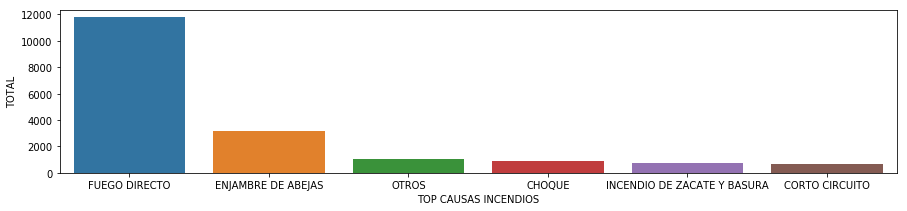

In [34]:
top_six = df['CAUSA'].value_counts()[:6]

x = top_six.index
y = top_six.values

plt.figure(figsize=(15,3))
ax= sns.barplot(x,y)
ax.set(xlabel='TOP CAUSAS INCENDIOS', ylabel='TOTAL')

[Text(0, 0.5, 'TOTAL'), Text(0.5, 0, 'TOP TIEMPO DE LLEGADA')]

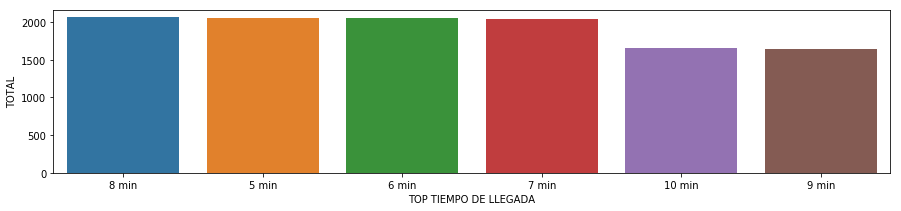

In [37]:
top_six = df['TIEMPO_DE_LLEGADA_MINUTOS'].value_counts()[:6]

x = list(map(lambda x: '%s min' % str(x), list(top_six.index)))
y = top_six.values

plt.figure(figsize=(15,3))
ax= sns.barplot(x,y)
ax.set(xlabel='TOP TIEMPO DE LLEGADA', ylabel='TOTAL')

In [38]:
total = len(df)
llamadas_falsas = len(df[df['TIPO']=='FALSA ALARMA'])

porcentaje = np.round(llamadas_falsas / total,3) * 100

"{0}% de llamdas falsas".format(porcentaje)

'6.1% de llamdas falsas'

In [41]:
no_existe = -1
total = len(df)
incendio_zacate = len(df[df['CAUSA'].str.find('ZACATE')!=no_existe])

porcentaje = np.round(incendio_zacate / total,3) * 100

"{0}% de incendios por zacate".format(porcentaje)

'3.2% de incendios por zacate'

,FOLIO,TIPO,LUGAR,FECHA,SALIDA,LLEGADA,CAUSA,COLONIA,ESTACION,TIPO_ID,...,SALIDA_MES,SALIDA_DIA,LLEGADA_AÑO,LLEGADA_MES,LLEGADA_DIA,FECHA_AÑO,FECHA_MES,FECHA_DIA,FECHA_DIA_SEMANA,TIEMPO_DE_LLEGADA_MINUTOS
3007,15042016-1111-FUGA-4Am,FUGA DE GAS LP Y/O GAS NATURAL,CASA,15-04-16,15-04-16 11:11,15-04-16 11:09,MAL ESTADO DEL CILINDRO Y/O VALVULAS,LA CHOLLA,4.0,10,...,4,15,2016,4,15,2016,4,15,4,1438
10930,02032017-0417-INZB-1D,INCENDIO DE ZACATE Y BASURA,CASA,2/3/2017,2/3/2017 4:17,2/3/2017 4:15,FUEGO DIRECTO,VILLA DE SERIS,1.0,18,...,3,2,2017,3,2,2017,3,2,3,1438
17223,24102017-1123-INZB 3 D,INCENDIO DE ZACATE Y BASURA,LOTE BALDIO,24-10-17,24-10-17 11:23,24-10-17 11:21,FUEGO DIRECTO,ALTARES,3.0,18,...,10,24,2017,10,24,2017,10,24,1,1438
21442,22042018-2331-IDCM 3 C,INCENDIO DE CASA DE MATERIAL,CASA,21-04-18,21-04-18 23:21,21-04-18 23:19,FUEGO DIRECTO,QUINTAS DEL SOL RESIDENCIAL VIII ETAPA,3.0,13,...,4,21,2018,4,21,2018,4,21,5,1438
21640,29042018-0840-RESC 3 C,RESCATE,VEHICULO,29-04-18,29-04-18 8:49,29-04-18 8:47,CHOQUE,SIN COLONIA,3.0,24,...,4,29,2018,4,29,2018,4,29,6,1438
